In [1]:
import torch
import torch.nn as nn

import source
from source import propagator

%matplotlib widget
import matplotlib.pyplot as plt

In [8]:
# Для повышения точности опираии умножения допускается изменение
# параметров array_size и vector_size.
# Минимальное значение array_size для коректной работы системы 4096.
# Размер вектора (vector_size) указывается с учётом интерполяции
# внутри оптической установки.

config = source.Config(array_size = 4096 * 2,
                       vector_size = 256 * 2,
                       device = torch.device('cuda'))

# Для моделирования распространения света в свободном пространстве
# доступно 4 оператора.
# Sinc является наиболее точным оператором распространения.

propagator_operator = propagator.Propagator_sinc_operator()
prop = propagator.Propagator(operator = propagator_operator,
                  config = config)
mul = source.OpticalMul(prop, config)

In [9]:
vec = (torch.rand(1, 1, 256) > 0.5).float()
mat = (torch.rand((1, 1, 256, 256)) > 0.5).float()

In [10]:
res = mul(mat, vec).cpu()[0, 0]

In [11]:
fr = (mat @ vec[...,None]).squeeze(-1)[0, 0]

In [12]:
CKO = (((fr / fr.mean() - res / res.mean())**2).sum() / fr.size(0))**0.5 * 100

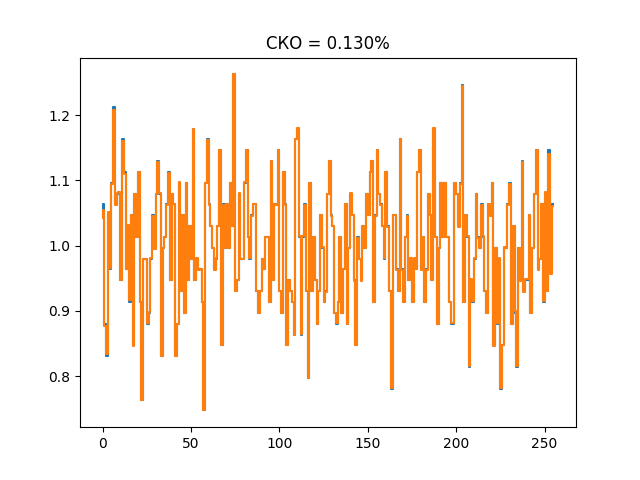

In [13]:
plt.figure()
# plt.plot(r / r.mean())
# plt.plot(w.cpu() / w.mean().cpu())
plt.step(range(fr.size(0)), fr / fr.mean())
plt.step(range(res.size(0)), res / res.mean())
plt.title(f"СКО = {CKO :.3f}%");